### Phase Space Plots
notebook to explore DPP by plotting phase space plots

In [2]:
%pylab inline
from scipy.integrate import odeint
from basic_units import radians

Populating the interactive namespace from numpy and matplotlib


In [3]:
def DrivenDampedPendulum(state, timep, betap, w_0, gammap, wd):
    """
    Function to return derivatives for driven, damped harmonic oscillator.
    theta_dot_dot = 2*beta*theta_dot - (w_0)**2 sin(theta) + gamma*cos(wd*t)
    calling routine must pass w_0, beta, gamma, and drive frequency wd
    """
    xdot=state[1]
#    vdot=-((w_0)**2)*sin(state[0])-2*(betap)*state[1]+(gammap)*cos(wd*time)

    vdot=-((w_0)**2)*sin(state[0])-2*(betap)*state[1]+(gammap)*(w_0**2)*cos(wd*timep)

    return array([xdot,vdot])

In [4]:
# function to return text formating for tick label
# in units of of pi_fraction*pi.  Seems to work for pi_fraction both less than and greater than 1 
# (eg. 1/4pi or 2pi)
# requires matplotlib.ticker



def fractions_of_pi(x,pos):
    if np.isclose(x/(pi_fraction*pi)%(1./(pi_fraction)),0.):
        # x is an integer, so just return that
        if x==0:
#            print("x is zero!!!")
            return 0
        else:
#            print("x is an integer !!!!")
            return r'${:.0f} \pi$'.format(x/(pi))
    else:
        # this returns a latex formatted fraction
        # Could check if fraction can be reduced
        # if (1./pi_fraction)%(x/(pi_fraction*pi)) is close to zero, then it can
        return '$\\frac{{{:2.0f}}}{{{:2.0f}}} \pi$'.format(x/(pi_fraction*pi),1./pi_fraction)
        # if you don't want to use latex, you could use this commented
        # line, which formats the fraction as "1/13"
        ### return '{:2.0f}/{:2.0f}'.format(x/step,1./step)



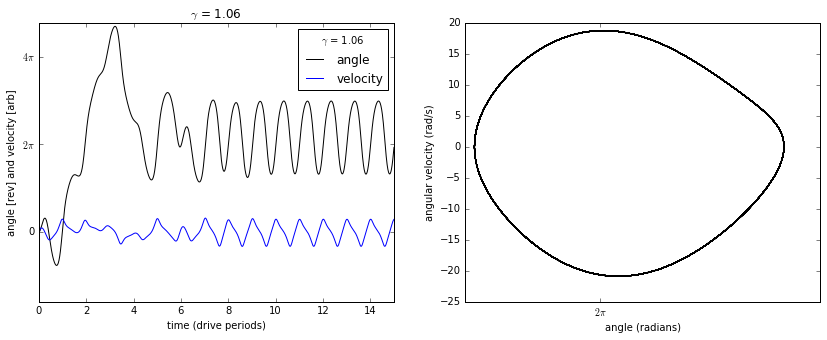

In [5]:
# Explore behavior of DDP, driven damped pendulum

wd=2*pi  # set drive freq to 2*pi, so that time is in units of drive period T
w_0=1.5*wd  # set natural freq to 1.5 times drive freq, so that drive is close (but lower than) resonance
beta = w_0/4
#theta_0=-pi/2  # initial angle is neg pi/2
theta_0=0  # initial angle is zero
v_theta_0 = 0.0  # initial velocity is zero
gamma=1.06

t_max=100
N=10000
pts_per_sec=N/t_max
skip=int(30*pts_per_sec)    # number of points in the beginning to skip when plotting.  set to zero for now.

# fill time array
time=linspace(0,t_max,N)

# call odeint
solution=odeint(DrivenDampedPendulum, [theta_0,v_theta_0], time, args=(beta, w_0, gamma, wd))
# print(solution)
pi_fraction=2.

fig1=figure()
ax1=subplot(1,2,1)
ax1.plot(time,solution[:,0],"k-",time,solution[:,1]/max(solution[:,1]))
#ax1.plot(time,solution[:,0],"k-",time,solution[:,1]/max(solution[:,1]), yunits=radians)
#ax1.plot(time,solution[:,0]/(2*pi),"k-",time,solution[:,1]/max(solution[:,1]))
#plot(time,solution[:,0]/(2*pi),"k-", time, 2.5*sin(wd*time-1*pi/16))
ax1.set_xlabel("time (drive periods)")
ax1.set_ylabel("angle [rev] and velocity [arb]")
ax1.set_xlim(0,15)
ax1.legend(["angle","velocity"],title="$\gamma$ = {:3}".format(gamma))
ax1.yaxis.set_major_locator(MultipleLocator(pi_fraction*pi))
ax1.yaxis.set_major_formatter(FuncFormatter(fractions_of_pi))
ax1.set_title("$\gamma$ = {:3}".format(gamma))
#xlim(5,6)
#xlim(40,50)
# Change tick interval to pi/2
ax1=gca()
#start, end = ax1.get_ylim()
#ax1.set_yticks(np.arange(start, end, pi/2))
ax2=subplot(1,2,2)
ax2.plot(solution[skip:,0],solution[skip:,1],"k-")
ax2.set_xlabel("angle (radians)")
ax2.set_ylabel("angular velocity (rad/s)")
#ax2.set_xlim(-2.5,-1.5)
ax2.xaxis.set_major_locator(MultipleLocator(pi_fraction*pi))
ax2.xaxis.set_major_formatter(FuncFormatter(fractions_of_pi))


fig1.set_size_inches(14,5)

